In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from tqdm import tqdm_notebook as tqdm
import requests as req

In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://en.wikipedia.org/wiki/List_of_coffee_varieties')

In [ ]:
name_list = []

for i in tqdm(range(1, 45)):
    name = driver.find_elements_by_css_selector('#mw-content-text > div.mw-parser-output > table.wikitable.sortable.jquery-tablesorter > tbody > tr:nth-child({}) > td:nth-child(1)'.format(i))
    for i in name:
        name_list.append(i.text)

C:\Users\82104\AppData\Local\Temp\ipykernel_32380\104744792.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(1, 45)):


  0%|          | 0/44 [00:00<?, ?it/s]

In [ ]:
species_list = []

for i in tqdm(range(1, 45)):
    species = driver.find_elements_by_css_selector('#mw-content-text > div.mw-parser-output > table.wikitable.sortable.jquery-tablesorter > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i))
    for i in species:
        species_list.append(i.text)

C:\Users\82104\AppData\Local\Temp\ipykernel_32380\2497871657.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(1, 45)):


  0%|          | 0/44 [00:00<?, ?it/s]

In [ ]:
regions_list = []

for i in tqdm(range(1, 45)):
    regions = driver.find_elements_by_css_selector('#mw-content-text > div.mw-parser-output > table.wikitable.sortable.jquery-tablesorter > tbody > tr:nth-child({}) > td:nth-child(3)'.format(i))
    for i in regions:
        regions_list.append(i.text)

C:\Users\82104\AppData\Local\Temp\ipykernel_32380\1993256697.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(1, 45)):


  0%|          | 0/44 [00:00<?, ?it/s]

In [ ]:
comments_list = []

for i in tqdm(range(1, 45)):
    comments = driver.find_elements_by_css_selector('#mw-content-text > div.mw-parser-output > table.wikitable.sortable.jquery-tablesorter > tbody > tr:nth-child({}) > td:nth-child(4)'.format(i))
    for i in comments:
        comments_list.append(i.text)

C:\Users\82104\AppData\Local\Temp\ipykernel_32380\4178040112.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(1, 45)):


  0%|          | 0/44 [00:00<?, ?it/s]

In [ ]:
len(name_list),len(species_list),len(regions_list),len(comments_list)

(44, 44, 44, 44)

In [ ]:
data = {"Name" : name_list, "Species" : species_list, "Region(s)" : regions_list, "Comments" : comments_list}

In [ ]:
Coffee = pd.DataFrame(data)
Coffee

,Name,Species,Region(s),Comments
0,Arusha,C. arabica,"Mount Meru in Tanzania, and Papua New Guinea",either a Typica variety or a French Mission.
1,Benguet,C. arabica,Philippines,Typica variety grown in Benguet in the Cordill...
2,"Bergendal, Sidikalang",C. arabica,Indonesia,Both are Typica varieties tat survived the lea...
3,Bernardina,C. arabica,El Salvador,"A variety discovered in Finca Los Bellotos, El..."
4,Blue Mountain,C. arabica,Blue Mountains region of Jamaica. Also grown i...,"A unique mutation of Typica, known to have som..."
5,Bourbon,C. arabica,"Réunion, Rwanda, Latin America.","Around 1708, the French planted coffee on the ..."
6,Catuai,C. arabica,Latin America,This is a hybrid of Mundo Novo and Caturra bre...
7,Catimor,Interspecific hybrid,"Latin America, Indonesia, India, Vietnam, Chin...",This is cross between Timor coffee and Caturra...
8,Caturra,C. arabica,Latin and Central America,Developed from two cultivars that originated b...
9,Charrier,C. charrieriana,Cameroon,This is a newly found species from Cameroon. I...


In [ ]:
import nltk
from nltk import pos_tag
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pickle
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
comments_list_nltk = ''
for i in comments_list:
    comments_list_nltk = comments_list_nltk + i

In [ ]:
comments_list_nltk

'either a Typica variety or a French Mission.Typica variety grown in Benguet in the Cordillera highlands of the northern Philippines since 1875.Both are Typica varieties tat survived the leaf rust outbreak of the 1880s; most of the other Typica in Indonesia was destroyed.A variety discovered in Finca Los Bellotos, El Salvador by Sofia and Fernando Alberto Pacas. It was first thought to be Geisha because of its aromatic profile. After studying its phenotype characteristics and DNA testing, however, it was determined to be a new, unclassified variety genetically similar to varieties found in the Agaro region of Ethiopia.A unique mutation of Typica, known to have some resistance to coffee berry disease.Around 1708, the French planted coffee on the island of Bourbon (now called Réunion) in the middle of the Indian Ocean, all probably from the same parent stock—the plant the Dutch gave them. Unsurprisingly, it mutated slightly and was planted throughout Brazil in the late 1800s and eventual

In [ ]:
nltk.corpus.stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
stopwords = ['i', 'be','see','lol.i','see','beans.i',
            'have','want','joe','look','bit','continue','winner.this',
            '”','t','bulletproof','say','“','do','me.i','[',']','coffee','typica']

In [ ]:
def extract_tags_english(string):
    word_list = []
    string = string.lower()
    string = nltk.word_tokenize(string)
    string = nltk.pos_tag(string)
       
    for word, tag in string:
        if tag in ['NN', 'VB']:
            if word not in stopwords: #if word not in stopwords:
                word_list.append(word)

    return word_list

In [ ]:
comments_list_nltk_update = extract_tags_english(comments_list_nltk)
comments_list_nltk_update

['variety',
 'mission.typica',
 'variety',
 'benguet',
 'cordillera',
 'leaf',
 'outbreak',
 'indonesia',
 'variety',
 'los',
 'bellotos',
 'salvador',
 'sofia',
 'fernando',
 'alberto',
 'pacas',
 'profile',
 'phenotype',
 'dna',
 'testing',
 'variety',
 'region',
 'ethiopia.a',
 'mutation',
 'resistance',
 'berry',
 'island',
 'bourbon',
 'réunion',
 'middle',
 'ocean',
 'parent',
 'stock—the',
 'plant',
 'dutch',
 'brazil',
 'latin',
 'america',
 'achieve',
 'level',
 'flavour',
 'réunion',
 'réunion',
 'earth',
 'soil',
 'bourbon',
 '%',
 'fruit',
 'hybrid',
 'mundo',
 'novo',
 'caturra',
 'brazil',
 'cross',
 'timor',
 'portugal',
 'india',
 'cultivar',
 'name',
 'cauvery',
 'mutation',
 'bourbon',
 'shrub',
 'serra',
 'caparaó',
 'yield',
 'bourbon',
 'plant',
 'distance',
 'disease',
 'arabica',
 'mutation',
 'formation',
 'pacas',
 'variety',
 'salvador',
 'bourbon',
 'villa',
 'sarchi',
 'costa',
 'rica',
 'bourbon',
 'bourbon',
 'poorer',
 'cup',
 'quality',
 'variety',
 'cam

In [ ]:
count = Counter(comments_list_nltk_update)
count

Counter({'variety': 19,
         'mission.typica': 1,
         'benguet': 1,
         'cordillera': 2,
         'leaf': 3,
         'outbreak': 1,
         'indonesia': 6,
         'los': 1,
         'bellotos': 1,
         'salvador': 4,
         'sofia': 1,
         'fernando': 1,
         'alberto': 1,
         'pacas': 3,
         'profile': 2,
         'phenotype': 1,
         'dna': 1,
         'testing': 1,
         'region': 6,
         'ethiopia.a': 1,
         'mutation': 7,
         'resistance': 2,
         'berry': 1,
         'island': 5,
         'bourbon': 16,
         'réunion': 3,
         'middle': 1,
         'ocean': 1,
         'parent': 2,
         'stock—the': 1,
         'plant': 3,
         'dutch': 2,
         'brazil': 5,
         'latin': 1,
         'america': 2,
         'achieve': 2,
         'level': 2,
         'flavour': 1,
         'earth': 1,
         'soil': 1,
         '%': 3,
         'fruit': 2,
         'hybrid': 9,
         'mundo': 2,
       

In [ ]:
count.most_common(10)

[('variety', 19),
 ('bourbon', 16),
 ('hybrid', 9),
 ('mutation', 7),
 ('quality', 7),
 ('indonesia', 6),
 ('region', 6),
 ('timor', 6),
 ('ethiopia', 6),
 ('island', 5)]

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
mask_image = np.array(Image.open(r'C:\Users\82104\Desktop\image\호랑이.jpg'))
mask_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
wordcloud = WordCloud(font_path='C:\Windows\Fonts\gulim.ttc',
                     width = 700,height=700
                      ,background_color='black',colormap = 'summer'
                      ,mask = mask_image
                      ,random_state=1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

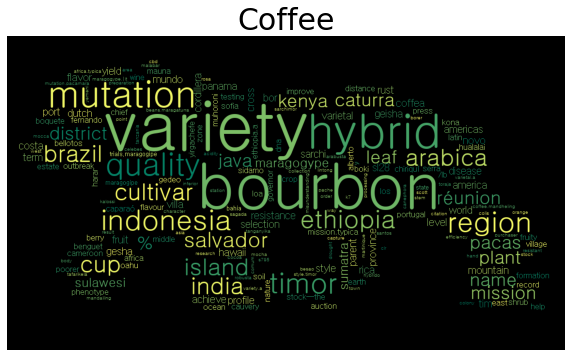

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Coffee", size = 30)
plt.show